In [1]:
import math
import numpy as np
import kplr

# Find the target KOI.
client = kplr.API()
koi = client.koi(97.01)

# Get a list of light curve datasets.
lcs = koi.get_light_curves(short_cadence=False)

# Open the first dataset and read it
f = lcs[0].open()
hdu_data = f[1].data
time = hdu_data["time"]  # get the time of each observation
flux = hdu_data["sap_flux"] # get the flux
flux_err = hdu_data["sap_flux_err"] # get the error in the flux
f.close()

# Problem 1

In [2]:
index = np.where((time > 124) & (time < 125))
time_obs = time[index]
flux_obs = flux[index]
flux_err_obs = flux_err[index]

In [3]:
import numpy as np
def function_F(flux):
    flux_selected=[]
    avg = np.mean(flux)
    std = np.std(flux)
    for i in range(0,len(flux),1):
        if(abs(flux[i]-avg)/std<=2):
            flux_selected.append(flux[i])
    return flux_selected


flux=flux_obs
for i in range(1,8,1):
    flux=function_F(flux)
flux_mean=sum(flux)/len(flux)
flux=flux_obs/flux_mean
error=flux_err_obs/flux_mean

# guess of z, using t0=124.51, tao=0.1, p=0.0775
t0=124.51
tao=0.1
z=(time_obs-t0)/tao

In [4]:
import math as m
import numpy as np
def integrator1(a,b,N,z,p):
    deltax=(b-a)/N
    xi=a
    i=0
    sum=0
    while(i<=N-1):
        xi=a+i*deltax
        sum=sum+deltax*func1(xi,p,z)
        i=i+1
    return sum

def integratorgeneral(a,b,N,z,p):
    deltax=(b-a)/N
    xi=a
    i=0
    sum=0
    while(i<=N-1):
        xi=a+i*deltax
        sum=sum+deltax*func2(xi,p,z)
        i=i+1
    return sum



def F_function(z,p,N):
    F1=integrator1(0,1,N,z,p)
    F2=integratorgeneral(0,1,N,z,p)
    return F1/F2

import my_transit

def I(r):
    '''A Limb-darkening function'''
    mu = (1 - (r**2))**(0.5)
    return 1 - (1 - (mu**(0.5)))

def func1(r, p, z):
    return I(r) * (1 - my_transit.delta(p,r,abs(z))) * 2 * r

def func2(r, p, z):
    return I(r) * 2 * r


# Find an eclipse shape use p=0.0775
F_estimated=[]
for i in range(0,len(flux),1):
    F_estimated.append(F_function(abs(z[i]),0.0775,1000))

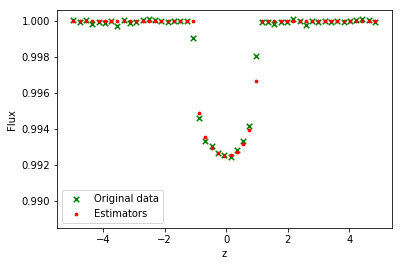

It is a good fit.


In [5]:
import matplotlib.pyplot as plt
p1=plt.scatter(z,flux,marker='x',color='g',label='1',s=30) 
p2=plt.scatter(z,F_estimated,marker='.',color='r',label='1',s=30) 
plt.ylim(0.9885,1.0006)
plt.legend([p1,p2],['Original data','Estimators'])
plt.xlabel('z')  
plt.ylabel('Flux')
plt.show()
print("It is a good fit.")

In [6]:
#compute X square
x_square=0
for i in range(0,len(flux),1):
    x_square=x_square+((flux[i]-F_estimated[i])/error[i])**2

In [7]:
print("X square=",x_square)

X square= 464.170373532


# Problem 2

In [8]:
from scipy.special import gamma
import numpy as np
from scipy.integrate import quad,dblquad,nquad
N=len(flux)
M=3
v=N-M #degrees of freedom
print('Q=',quad(lambda  x:np.exp(-x)*x**(v/2-1),x_square/2,np.inf)/gamma(v/2))
print("since p-value is too low, it is not a good fit.")

Q= [  1.75064678e-70   1.48683023e-73]
since p-value is too low, it is not a good fit.


# Problem 3

In [9]:
#vary tao
tao=0.08
t0=124.51
x_squarelist=[]
tao_list=[]
while tao<0.13:
    tao_list.append(tao)
    z=(time_obs-t0)/tao
    F_estimated=[]
    for i in range(0,len(flux),1):
        F_estimated.append(F_function(abs(z[i]),0.0775,1000))
    x_square=0
    for i in range(0,len(flux),1):
        x_square=x_square+((flux[i]-F_estimated[i])/error[i])**2
    x_squarelist.append(x_square)
    tao=tao+0.001    

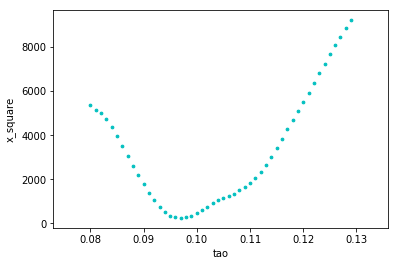

In [11]:
p1=plt.scatter(tao_list,x_squarelist,marker='.',color='c',label='1',s=30) 
plt.xlabel('tao')  
plt.ylabel('x_square')
plt.show()

In [12]:
minval=np.min(x_squarelist)
index=np.where(x_squarelist==minval)

In [13]:
index

(array([17]),)

In [14]:
print('minimum x square=',x_squarelist[17],'tao=',tao_list[17])

minimum x square= 245.082238281 tao= 0.09700000000000002


In [15]:
#plot for tao=0.097
t0=124.51
z=(time_obs-t0)/0.097
# Find an eclipse shape use p=0.0775
F_estimated=[]
for i in range(0,len(flux),1):
    F_estimated.append(F_function(abs(z[i]),0.0775,1000))

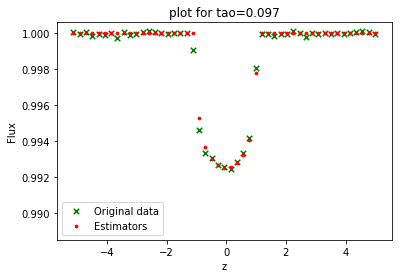

In [16]:
p1=plt.scatter(z,flux,marker='x',color='g',label='1',s=30) 
p2=plt.scatter(z,F_estimated,marker='.',color='r',label='1',s=30) 
plt.ylim(0.9885,1.0006)
plt.legend([p1,p2],['Original data','Estimators'])
plt.xlabel('z')  
plt.ylabel('Flux')
plt.title('plot for tao=0.097') 
plt.show()

In [17]:
print('Q(tao=0.097)=',quad(lambda  x:np.exp(-x)*x**(v/2-1),x_squarelist[17]/2,np.inf)/gamma(v/2))
print("since p-value is too low, it is not a good fit.")

Q(tao=0.097)= [  5.72161036e-29   8.49177109e-31]
since p-value is too low, it is not a good fit.


In [31]:
tao=0.0965
t0=124.51
x_squarelist2=[]
tao_list2=[]
while tao<0.0975:
    tao_list2.append(tao)
    z=(time_obs-t0)/tao
    F_estimated2=[]
    for i in range(0,len(flux),1):
        F_estimated2.append(F_function(abs(z[i]),0.0775,1000))
    x_square=0
    for i in range(0,len(flux),1):
        x_square=x_square+((flux[i]-F_estimated2[i])/error[i])**2
    x_squarelist2.append(x_square)
    tao=tao+0.00002   

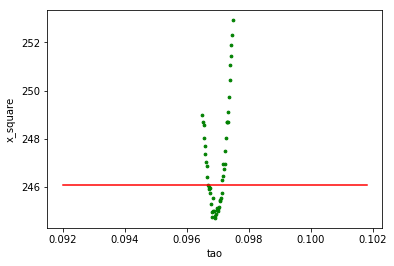

In [46]:
p1=plt.scatter(tao_list2,x_squarelist2,marker='.',color='g',label='1',s=30) 
plt.xlabel('tao')  
plt.ylabel('x_square')
x=np.arange(0.092,0.102,0.0002)
y=x_squarelist[17]+1+x*0
p2=plt.plot(x,y,color='r')
plt.show()

In [37]:
index = np.where(x_squarelist2 < x_squarelist[17]+1)

In [38]:
index

(array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
        27, 28, 29, 30, 31]),)

In [49]:
uncertainty=tao_list2[31]-tao_list2[10]
print("one-sigma uncertainty=",uncertainty)

one-sigma uncertainty= 0.0004200000000001286


# Problem 4

In [50]:
import emcee
import numpy as np
import matplotlib.pyplot as plt

In [54]:
def xquare(p,t0,tao):
    z=(time_obs-t0)/tao
    F_estimated=[]
    for i in range(0,len(flux),1):
        F_estimated.append(F_function(abs(z[i]),p,1000))
    x_square=0
    for i in range(0,len(flux),1):
        x_square=x_square+((flux[i]-F_estimated[i])/error[i])**2
    return x_square

In [85]:
def lnprob(x, ivar):
    p,t0,tao=x
    return -0.5 * np.sum(ivar * xquare(p,t0,tao))

ndim, nwalkers = 3, 100
ivar = 1. / np.random.rand(ndim)

In [86]:
p0 = [np.random.rand(ndim) for i in range(nwalkers)]

In [101]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=[ivar])

In [102]:
sampler.run_mcmc(p0, 5)

(array([[ 1.37837367,  1.47541041,  0.4132489 ],
        [ 0.75490722,  0.45306474,  0.22180249],
        [-4.72181113, -0.31247242,  1.76238655],
        [-3.2441988 ,  6.37690906, -0.04104177],
        [ 2.16086066,  2.29022761,  1.29345999],
        [ 2.45819997,  1.23681241,  1.89122292],
        [ 1.60495635,  0.76782936,  0.60738695],
        [ 0.22128582, -0.56557402, -0.32999338],
        [ 0.01002026,  0.96659273,  0.33411621],
        [ 0.79289887,  1.70605869, -0.43731816],
        [ 0.09686945,  0.9075503 ,  0.50653176],
        [ 4.52884968,  2.37369824, -0.21235632],
        [ 0.13135769,  0.98203741,  0.81482795],
        [-0.16607496,  0.04088446,  1.19309132],
        [ 0.22261844,  0.67089789,  0.23799777],
        [ 0.90075051, -2.53395932,  2.79140584],
        [-0.38201526,  1.34405711,  0.78417992],
        [ 1.60918483,  1.86534677,  1.13967827],
        [-1.00714878,  0.65469331,  1.99137266],
        [-1.82115066,  0.53946517,  0.08074879],
        [-0.81896539

In [97]:
samples = sampler.chain[:, 20:, :].reshape((-1, ndim))

In [103]:
import corner
fig = corner.corner(samples, labels=["$p$", "$t_0$", "$tau$"])
fig.show()

AssertionError: I don't believe that you want more dimensions than samples!